This Jupyter notebook walks through some of the most common charting scripts. Should be able to copy and paste easily
- Create a generic data frame, with some random numbers and values
- Plot a line
- Plot a bar
- Plot a histogram
- Plot a combination chart

This is a very useful diagram from https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
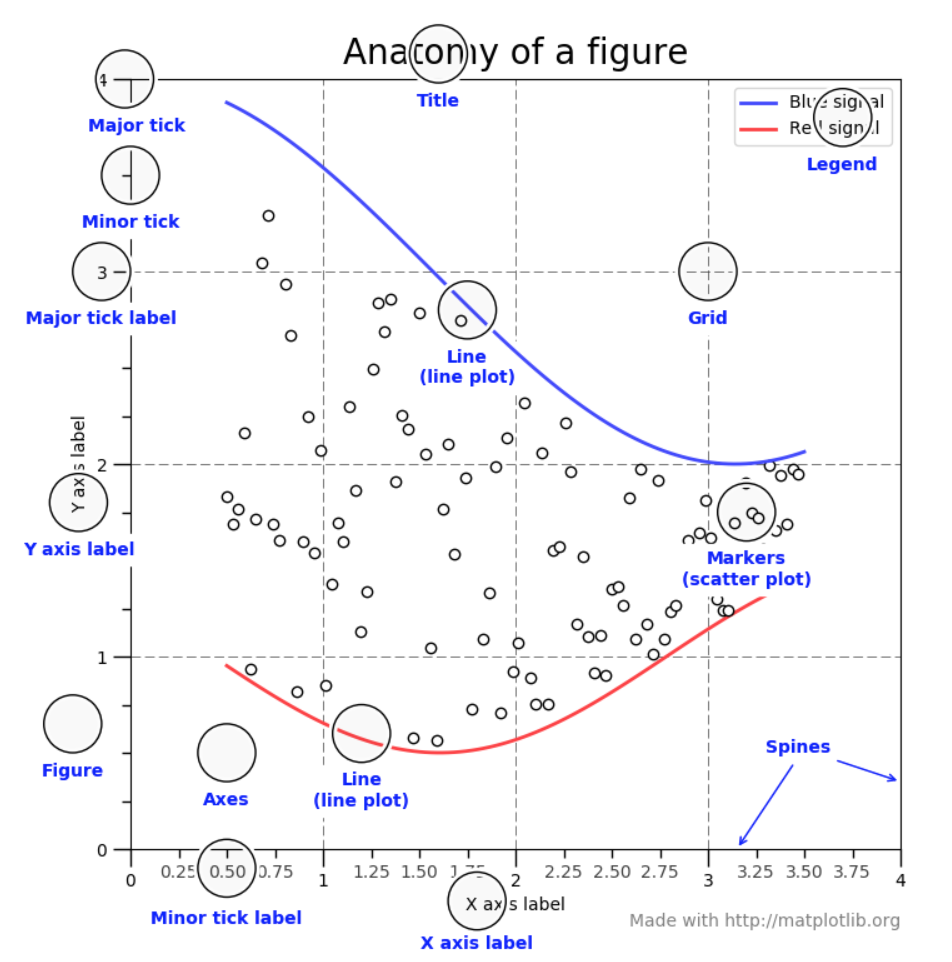

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a data frame
rowIndex = np.arange(1,26) # e.g. 1, 2, 3, ... 25
colA = np.random.randint(101, size=25) # e.g. [ x, y, z... ], 25 random numbers between 0 and 100
colB = np.random.randint(101, size=25) 
df = pd.DataFrame(data={"ID":rowIndex, "Column A":colA, "Column B": colB})

In [3]:
df.head()

,ID,Column A,Column B
0,1,30,48
1,2,70,47
2,3,9,44
3,4,15,96
4,5,68,77


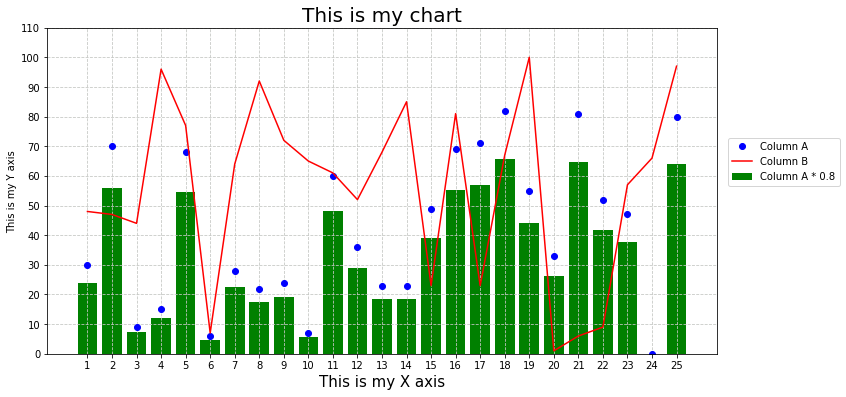

In [4]:
# Basic figure, with size and subtitles
fig = plt.figure(figsize=(12,6))


# Choose one of the below:
# plt.plot(df["ID"],df["Column A"]) #x, y, no marker = default to line
plt.plot(df["ID"],df["Column A"], 'o', color='b', label="Column A") # x, y, marker
plt.bar(df["ID"],df["Column A"] * 0.8, color='g', label="Column A * 0.8") # x, y, marker
plt.plot(df["ID"],df["Column B"], color='r', label="Column B") # x, y, smaller dot


#Optional stuff
#Grid
# See colors here: https://matplotlib.org/2.0.2/api/colors_api.html
plt.grid(which = 'major', color='#C5C7C4', linestyle='--')

# Labels
plt.title("This is my chart", fontsize=20)
plt.xlabel("This is my X axis", fontsize=15)
plt.ylabel("This is my Y axis", fontsize=10)

# Setting the tick marks. it'll default 
plt.xticks(df["ID"])  
plt.yticks((np.arange(0, 120, step=10)))

#Legends
# Key here is that the lines above, needs to have the labels. That's what the legend uses to figure out what to put there.
# See what location means here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
# The bbox_to_anchor puts the legend within (0-1) or outside (1+) of the plot area (x,y)
plt.legend(loc=3, bbox_to_anchor=(1.01, 0.5))


#If you don't have this print it'll show some weird log
print()

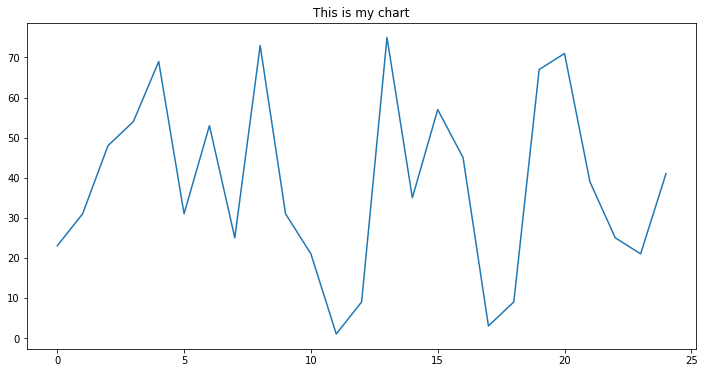

In [5]:
fig = plt.figure(figsize=(12,6))
plt.title("This is my chart")
plt.plot(df.index,df["Column A"]) #x, y, no marker = lines
print()

<BarContainer object of 25 artists>

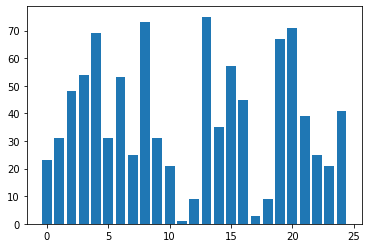

In [6]:
plt.bar(x=df.index, height=df["Column A"])

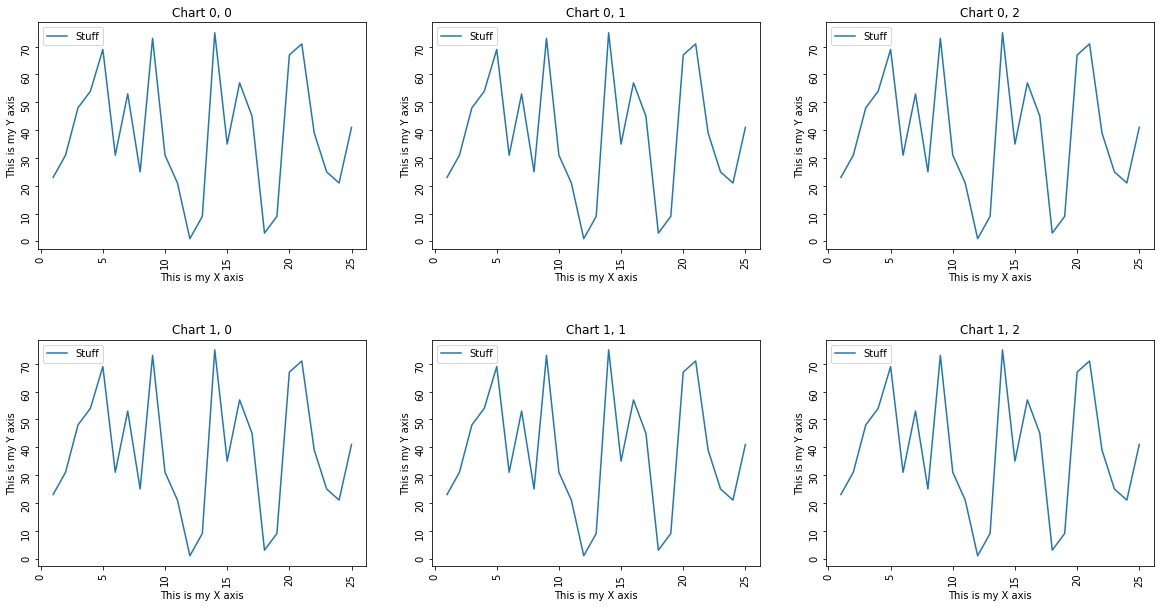

In [18]:
#Sometimes you want to plot a bunch of subplots
rowCount = 2
colCount = 3
fig, axs = plt.subplots(rowCount, colCount, figsize=(20,10))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
for i in range(0,rowCount):
    for j in range(0,colCount):
        axs[i, j].plot(df["ID"],df["Column A"], label = "Stuff")
        axs[i, j].tick_params(labelrotation=90)
        axs[i, j].set_title("Chart " + str(i) + ", " + str(j))
        axs[i, j].set_xlabel("This is my X axis", fontsize=10)
        axs[i, j].set_ylabel("This is my Y axis", fontsize=10)
        axs[i, j].legend()

plt.show()